In [1]:
#import basic libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

#Evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

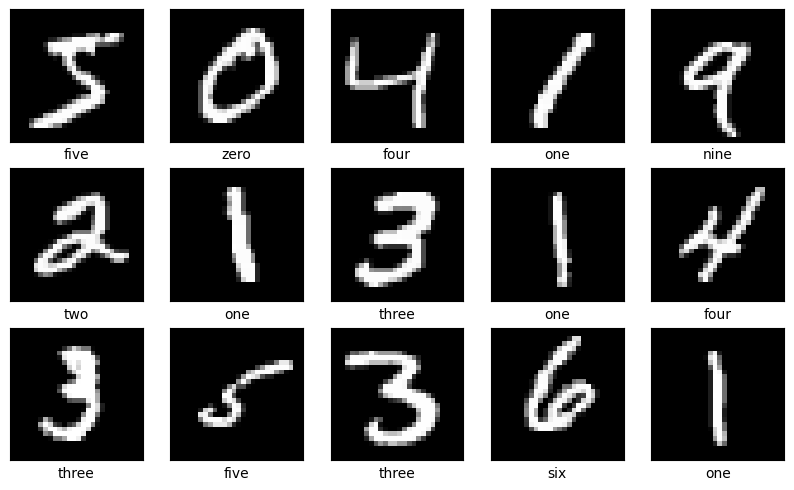

In [3]:
##Names of numbers in the dataset in order 
col_names=['zero','one','two','three','four','five','six','seven','eight','nine']
#creates a list called col_names containing the names of numbers from zero to nine. 
#This is presumably for labeling the images when they are visualized.
##Visualizing the digits
plt.figure(figsize=(10,10))
#This line creates a new figure with a specified size of 10x10 inches.
for i in range(15):
    #This initiates a loop that iterates 15 times. It's going to visualize 15 images.
    plt.subplot(5,5,i+1) 
    #This sets up a grid of subplots with 5 rows and 5 columns.It selects the i+1th subplot for the current iteration.
    plt.xticks([])
    plt.yticks([])
    #This removes the ticks(markers or labels) on both the x and y axes, resulting in a cleaner visualization.
    plt.imshow(x_train_digit[i],cmap='gray')
    #This displays the ith image from the x_train_digit dataset. 
    #cmap='gray' sets the color map to grayscale, which is common for visualizing images.
    plt.xlabel(col_names[y_train_digit[i]])
    #This sets the label of the x-axis to the corresponding name of the digit based on the y_train_digit dataset. 
    #This is where col_names comes into play.
plt.show()

In [4]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train_digit.shape

(60000, 28, 28)

In [6]:
x_test_digit.shape

(10000, 28, 28)

In [7]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [8]:
x_train_digit=x_train_digit.astype('float32')/255
x_test_digit=x_test_digit.astype('float32')/255

In [9]:
x_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x_test_digit.shape

(10000, 784)

In [11]:
y_train_digit=to_categorical(y_train_digit, num_classes=10)
y_test_digit=to_categorical(y_test_digit, num_classes=10)
#This line applies one-hot encoding to the y_train_digit labels. The num_classes parameter specifies the total number of classes in your dataset. 
#In this case, since it's working with digits, there are 10 classes (0 to 9).

In [12]:
y_test_digit[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
model=keras.Sequential([
#This creates a Sequential model, which is a linear stack of layers. This means that the layers are added one by one in sequence.
    layers.Dense(256, activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
#This line adds a Dense layer to the model. A Dense layer is a fully connected layer
#where each neuron in the layer is connected to every neuron in the previous layer. 
#This layer has 256 neurons. The activation function used here is ReLU (Rectified Linear Unit) 
#which introduces non-linearity to the network. 
#input_shape=(784,) specifies that the input to this layer is a vector of length 784, 
#which corresponds to a flattened image of size 28x28 pixels (commonly used in image classification tasks).
    layers.Dense(75,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
#This line adds another Dense layer with 75 neurons and ReLU activation. 
#This layer doesn't need an input_shape parameter because it automatically takes the shape of the output 
#from the previous layer as its input.
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(80,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(65,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
#These lines add three more Dense layers with 50, 80, and 65 neurons, respectively, all using ReLU activation.
    layers.Dense(10,activation='softmax'),
#This line adds the output layer with 10 neurons, which corresponds to the number of classes in the classification task. 
#The activation function used here is softmax, which is commonly used for multi-class classification problems. 
#It normalizes the output into a probability distribution over the classes, ensuring that the output values sum up to 1.
])
#Overall, this model consists of an input layer with 784 neurons (flattened image), followed by several hidden 
#layers with varying numbers of neurons and ReLU activation, and finally an output layer with 10 neurons and 
#softmax activation for classification.

In [14]:
model.summary()
#provides a quick overview of the model's architecture and the number of parameters it contains, 
#which can be helpful for debugging, optimizing, and understanding the complexity of the neural network.
#Param column displays the number of parameters (weights and biases) in each layer. 
#These parameters are what the model learns during training. For a Dense layer, 
#the number of parameters is calculated as (input_size + 1) * output_size. The +1 accounts for the bias term.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 75)                19275     
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 75)                300       
 chNormalization)                                       

In [15]:
#compiling the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
history=model.fit(x_train_digit,y_train_digit, batch_size=100, epochs=25, validation_data=(x_test_digit,y_test_digit))

Epoch 1/25


600/600 [==============================] - 11s 11ms/step - loss: 0.9338 - accuracy: 0.7051 - val_loss: 0.2458 - val_accuracy: 0.9308
Epoch 2/25
600/600 [==============================] - 6s 10ms/step - loss: 0.3841 - accuracy: 0.8984 - val_loss: 0.1513 - val_accuracy: 0.9586
Epoch 3/25
600/600 [==============================] - 6s 10ms/step - loss: 0.2892 - accuracy: 0.9270 - val_loss: 0.1331 - val_accuracy: 0.9636
Epoch 4/25
600/600 [==============================] - 6s 10ms/step - loss: 0.2451 - accuracy: 0.9388 - val_loss: 0.1266 - val_accuracy: 0.9685
Epoch 5/25
600/600 [==============================] - 6s 10ms/step - loss: 0.2222 - accuracy: 0.9442 - val_loss: 0.1053 - val_accuracy: 0.9737
Epoch 6/25
600/600 [==============================] - 7s 11ms/step - loss: 0.2028 - accuracy: 0.9502 - val_loss: 0.1000 - val_accuracy: 0.9737
Epoch 7/25
600/600 [==============================] - 7s 11ms/step - loss: 0.1893 - accuracy: 0.9529 - val_loss: 0.1055 - val_accuracy: 0.9

In [17]:
y_predict=model.predict(x_test_digit)
y_predict

313/313 [==============================] - 1s 3ms/step


array([[4.1586017e-07, 2.5231471e-05, 1.9397675e-04, ..., 9.9938524e-01,
        2.2061065e-06, 2.4865670e-04],
       [6.8364493e-06, 9.4840376e-05, 9.9940109e-01, ..., 1.5433016e-05,
        3.4667730e-05, 6.4105785e-07],
       [1.0739045e-06, 9.9991405e-01, 6.2817467e-06, ..., 1.7336768e-05,
        3.5549201e-05, 5.3133526e-06],
       ...,
       [3.8204885e-06, 3.2728414e-05, 9.9518562e-05, ..., 1.2590828e-04,
        3.9098231e-05, 1.2989632e-03],
       [4.2083861e-06, 5.5694687e-07, 7.0809654e-07, ..., 4.4576663e-07,
        2.5514602e-05, 2.8191447e-05],
       [8.7304516e-06, 5.2258662e-07, 1.2076339e-06, ..., 2.3935712e-07,
        2.1995572e-06, 6.6020215e-07]], dtype=float32)

In [18]:
y_predicts=np.argmax(y_predict,axis=1)
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\hp\AppData\Local\Temp\ipykernel_4544\1991900583.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


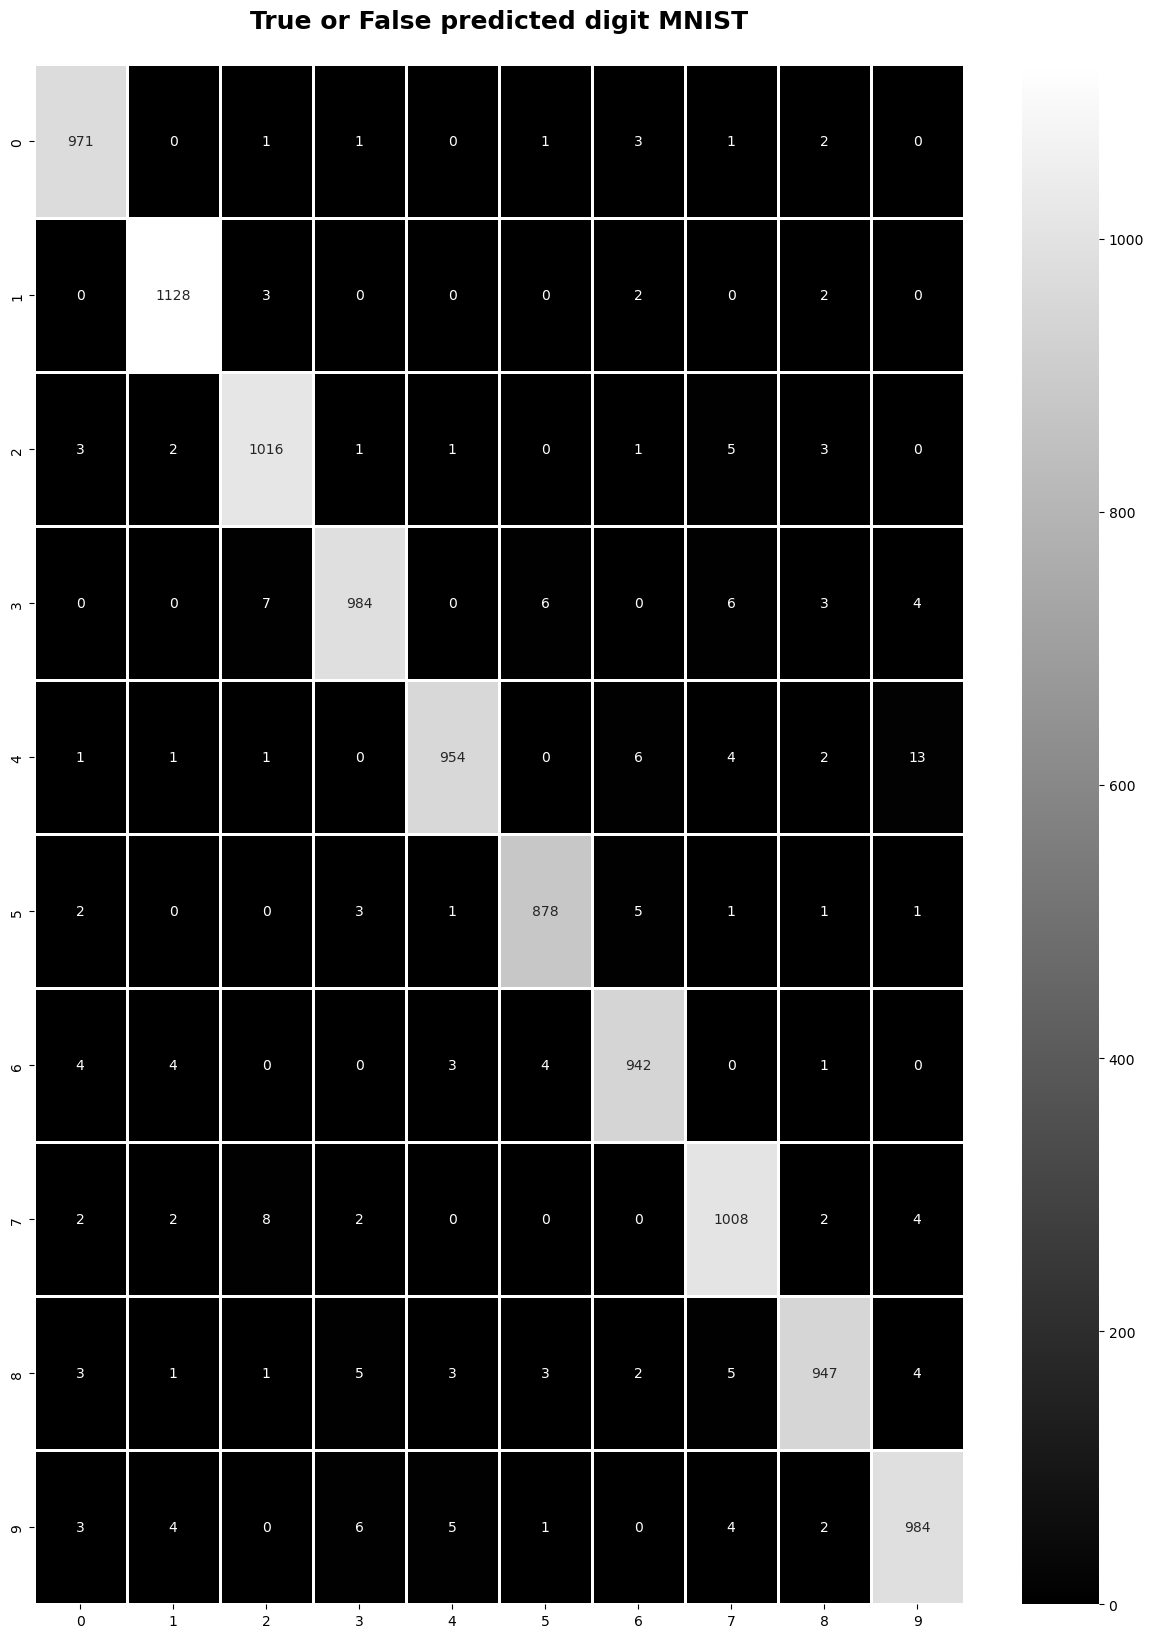

In [20]:
#Confusion matrix for digit Mnist
con_mat=confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(15,20))
sns.heatmap(con_mat,annot=True, annot_kws={'size':10},linewidths=1.0,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=18)
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval, y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


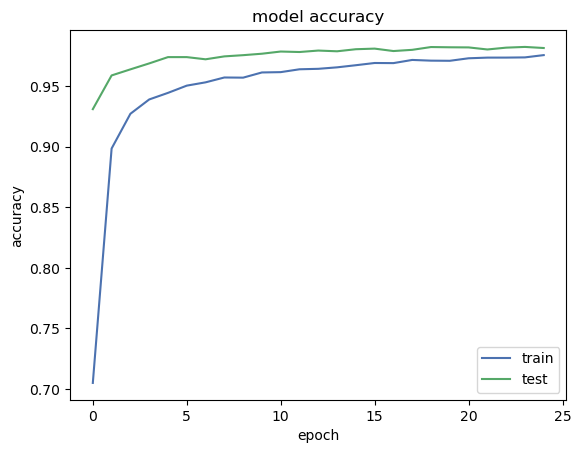

In [23]:
#Summarize history for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

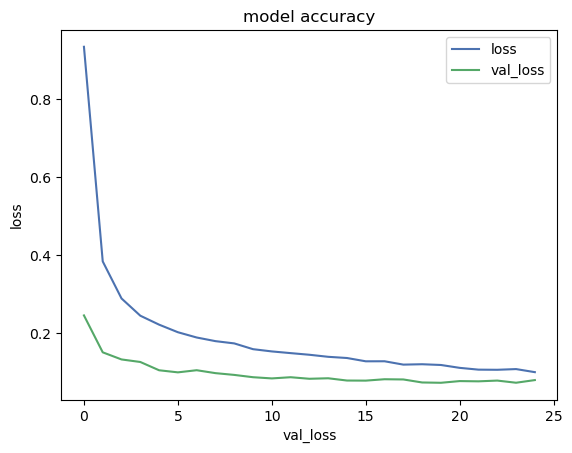

In [30]:
#Summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss','val_loss'],loc='best')
plt.show()

In [25]:
#tf expand_dims(x_test_digit[0])
y_predict_single=model.predict(x_test_digit[[3]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

1/1 [==============================] - 0s 82ms/step


In [26]:
col_names=['Zero','one','two','three','four','five','six','seven','eight','nine']

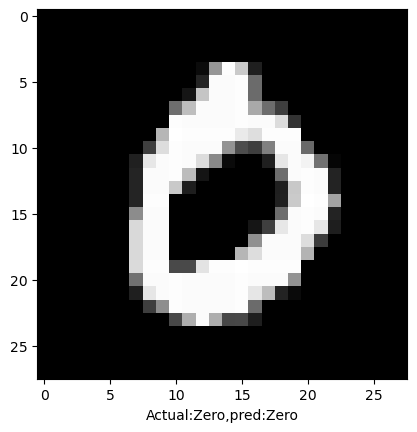

In [31]:
plt.imshow(x_test_digit[[3]].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},pred:{}".format(col_names[np.argmax(y_test_digit[3])],col_names[y_predicts_single[0]]))
plt.show()